# Bibliotecas e *drives*

In [0]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

*acessando minha pasta do Gdrive onde estão as informações que preciso*

In [0]:
#from google.colab import drive # Essa célula monta o drive, vai exigir autenticação para ler e manipular os arquivos
#drive.mount('/content/gdrive') # autenticação, copiar a chave de acesso que será disponibilizada

### optei por não usar, pois o google disponibilizou uma função para isso

In [2]:
#acessando a pasta
%cd /content/drive/My\ Drive/Colab\ Notebooks/covid19

/content/drive/My Drive/Colab Notebooks/covid19


In [3]:
!ls #verificando o conteudo da pasta

 API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 brasil_20200324.csv
 brasil_20200326.csv
 Brasil_20200327.html
 Brasil_covid19.html
 casos_100mil-2020.04.10.png
 casos_100mil-2020.04.14.png
 casos_100mil-2020.04.18.png
 casos_100mil-2020.04.24.png
 casos_100mil-2020.05.03.png
 casos_100mil-2020.05.06.png
 casos_100mil-2020.05.13.png
 covid19Brazil-script.ipynb
 covid19-script.ipynb
 covid19-scripts-trash.ipynb
 covid19-SEIR.ipynb
'Documento sem título.gdoc'
 estimativa_brasil-2020.04.10.png
 estimativa_brasil-2020.04.14.png
 estimativa_brasil-2020.04.18.png
 estimativa_brasil-2020.04.24.png
 estimativa_brasil-2020.05.03.png
 estimativa_brasil-2020.05.06.png
 estimativa_brasil-2020.05.13.png
 evolução-global-2020.04.10.png
 evolução-global-2020.04.14.png
 evolução-global-2020.04.18.png
 evolução-global-2020.04.24.png
 evolução-global-2020.05.03.png
 evolução-global-2020.05.06.png
 evolução-global-2020.05.13.png
 full_data_20200320.csv
 full_data_20200321.csv
 full_data_2020032

# Carregando o banco de dados

In [4]:
url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
data = requests.get(url).content
full_df = pd.read_csv(io.StringIO(data.decode('utf-8')))

#pop_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv', error_bad_lines=False)

full_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [0]:
brazil_df = full_df[full_df['location']=='Brazil']
china_df = full_df[full_df['location']=='China']
italy_df = full_df[full_df['location']=='Italy']
iran_df = full_df[full_df['location']=='Iran']
spain_df = full_df[full_df['location'] == 'Spain']
canada_df = full_df[full_df['location'] == 'Canada']
usa_df = full_df[full_df['location']=='United States']
uk_df = full_df[full_df['location']=='United Kingdom']
france_df = full_df[full_df['location'] == 'France']

In [6]:
usa_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
17409,2019-12-31,United States,0,0,0,0
17410,2020-01-01,United States,0,0,0,0
17411,2020-01-02,United States,0,0,0,0
17412,2020-01-03,United States,0,0,0,0
17413,2020-01-04,United States,0,0,0,0


In [0]:
brazil_df = brazil_df[brazil_df['total_cases'] != 0].reset_index()
china_df = china_df[china_df['total_cases'] != 0].reset_index()
italy_df = italy_df[italy_df['total_cases'] != 0].reset_index()
usa_df = usa_df[usa_df['total_cases'] != 0].reset_index()
iran_df = iran_df[iran_df['total_cases'] != 0].reset_index()
spain_df = spain_df[spain_df['total_cases'] != 0].reset_index()
canada_df = canada_df[canada_df['total_cases'] != 0].reset_index()
uk_df = uk_df[uk_df['total_cases'] != 0].reset_index()
france_df = france_df[france_df['total_cases'] != 0].reset_index()

In [8]:
usa_df.total_cases.max()

1528568

In [0]:
#pop_df[pop_df.index == 'Iran']


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64


In [0]:
#population in 2018, par 100,000
brazil_df['Pop'] = 209_469_333/100_000
usa_df['Pop'] = 327_167_434/100_000
italy_df['Pop'] = 60_431_283/100_000
iran_df['Pop'] = 81_650_656/100_000
spain_df['Pop'] = 46_723_749/100_000
canada_df['Pop'] = 37_058_856/100_000
uk_df['Pop'] = 66_488_991/100_000
france_df['Pop'] = 66_987_244/100_000
china_df['Pop'] = 19_000_000/100_000 #Wuhan region

In [0]:
brazil_df['Cases'] = brazil_df['total_cases']/brazil_df['Pop']
usa_df['Cases'] = usa_df['total_cases']/usa_df['Pop']
italy_df['Cases'] = italy_df['total_cases']/italy_df['Pop']
iran_df['Cases'] = iran_df['total_cases']/iran_df['Pop']
spain_df['Cases'] = spain_df['total_cases']/spain_df['Pop']
canada_df['Cases'] = canada_df['total_cases']/canada_df['Pop']
uk_df['Cases'] = uk_df['total_cases']/uk_df['Pop']
france_df['Cases'] = france_df['total_cases']/france_df['Pop']
china_df['Cases'] = china_df['total_cases']/china_df['Pop']

In [0]:
usa_df

,index,date,location,new_cases,new_deaths,total_cases,total_deaths,Pop,Cases
0,12313,2020-01-21,United States,1,0,1,0,3271.67434,0.000306
1,12314,2020-01-22,United States,0,0,1,0,3271.67434,0.000306
2,12315,2020-01-23,United States,0,0,1,0,3271.67434,0.000306
3,12316,2020-01-24,United States,0,0,1,0,3271.67434,0.000306
4,12317,2020-01-25,United States,1,0,2,0,3271.67434,0.000611
...,...,...,...,...,...,...,...,...,...
90,12403,2020-04-20,United States,24601,1772,759687,40682,3271.67434,232.201289
91,12404,2020-04-21,United States,28065,1857,787752,42539,3271.67434,240.779466
92,12405,2020-04-22,United States,37289,2524,825041,45063,3271.67434,252.176994
93,12406,2020-04-23,United States,17588,1721,842629,46784,3271.67434,257.552835


# Plotando

defindo o básico

In [0]:
def my_plots (df, coluna, cor, country):
  plt.plot(df.index, df[coluna], linewidth=4, color=cor, label=country)

def visao_artistica(pos_x, pos_y):
  text_box = 'Dia ZERO: \n China: 31/12/2019 \n USA: 21/01/2020 '\
             '\n França: 25/01/2020 \n Canadá: 26/01/2020 \n Itália: 31/01/2020'\
             '\n UK: 31/01/2020 \n Espanha: 01/02/2020 \n Irã: 20/02/2020'\
             '\n Brasil: 26/02/2020'
  prop = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
  ax.text(pos_x, pos_y, text_box, transform=ax.transAxes, fontsize=12,
          verticalalignment='bottom', bbox=prop)
  
def my_bar_plots(df, coluna, cor, country, dia_Z):
  ax.bar(df.index, df[coluna], width=0.8, color=cor, label=country)
  ax.legend(fontsize=8, loc=2)
  text = "Dia ZERO: {:}"
  text = text.format(dia_Z) 
  ax.text(0.02, 0.15, text, transform=ax.transAxes, fontsize=8, 
          verticalalignment='bottom', bbox=props)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)


gráfico Casos Totais

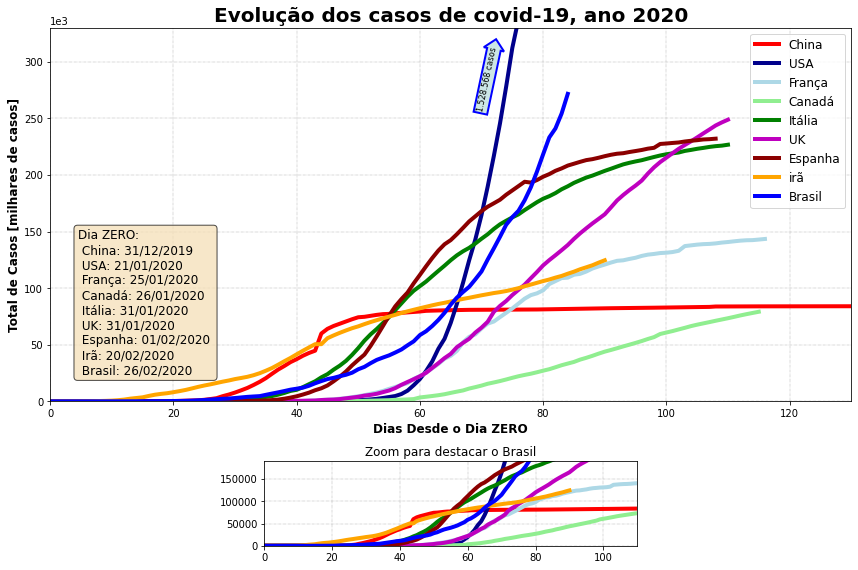

In [18]:
fig1 = plt.figure(figsize=(12,8))

#plotando o principal
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
ax1.axis([0, 130, -1, 330000])
my_plots(china_df, 'total_cases', 'red', 'China')
my_plots(usa_df, 'total_cases', 'darkblue', 'USA')
my_plots(france_df, 'total_cases', 'lightblue', 'França')
my_plots(canada_df, 'total_cases', 'lightgreen', 'Canadá')
my_plots(italy_df, 'total_cases', 'green', 'Itália')
my_plots(uk_df, 'total_cases', 'm', 'UK')
my_plots(spain_df, 'total_cases', 'darkred', 'Espanha')
my_plots(iran_df, 'total_cases', 'orange', 'irã')
my_plots(brazil_df, 'total_cases', 'blue', 'Brasil')
ax1.grid(ls='-.', lw=0.45)
ax1.legend(fontsize=12, loc='upper right')
ax1.set_title('Evolução dos casos de covid-19, ano 2020', fontsize=20, 
              weight='bold')
ax1.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)
ax1.set_ylabel('Total de Casos [milhares de casos]', weight='bold', fontsize=12)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

#zoom para destacar o Brasil
ax2 = plt.subplot2grid((4,4), (3,1), colspan=2, rowspan=1)
ax2.axis([0, 110, -1, 190000])
my_plots(china_df, 'total_cases', 'red', 'China')
my_plots(usa_df, 'total_cases', 'darkblue', 'USA')
my_plots(france_df, 'total_cases', 'lightblue', 'França')
my_plots(canada_df, 'total_cases', 'lightgreen', 'Canadá')
my_plots(italy_df, 'total_cases', 'green', 'Itália')
my_plots(uk_df, 'total_cases', 'm', 'UK')
my_plots(spain_df, 'total_cases', 'darkred', 'Espanha')
my_plots(iran_df, 'total_cases', 'orange', 'irã')
my_plots(brazil_df, 'total_cases', 'blue', 'Brasil')
ax2.grid(ls='-.', lw=0.45)
ax2.set_title('Zoom para destacar o Brasil')

fig1.tight_layout(pad=1.0)

#visao artistica
ax = plt.gca()
visao_artistica(-0.5, 2.0)

props_usa = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
text_usa = ax1.text(71, 285000, '1.528.568 casos', ha="center", va="center", rotation=78,
            size=8, bbox=props_usa)


plt.show()
fig1.savefig("evolução-global-2020.05.20.png", bbox_inches='tight', dpi=600)

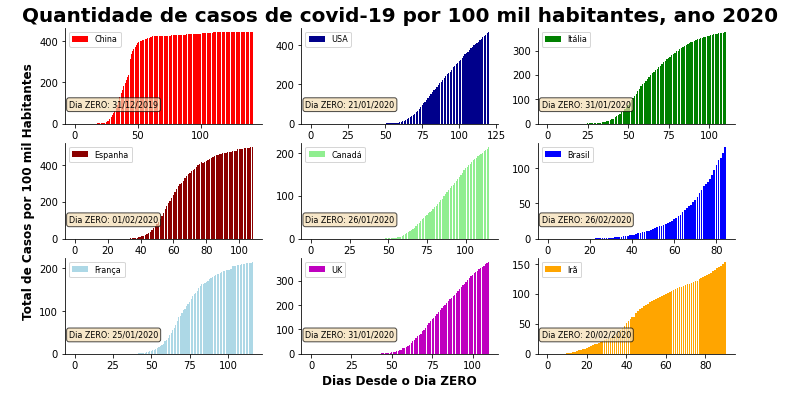

In [19]:
fig2 = plt.figure(figsize=(12,6))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

# CHINA
ax = fig2.add_subplot(331)
my_bar_plots(china_df, 'Cases', 'red', 'China', '31/12/2019')

# USA
ax = fig2.add_subplot(332)
my_bar_plots(usa_df, 'Cases', 'darkblue', 'USA', '21/01/2020')
ax.set_title('Quantidade de casos de covid-19 por 100 mil habitantes, ano 2020',
             fontsize=20, weight='bold')

#ITÁLIA
ax = fig2.add_subplot(333)
my_bar_plots(italy_df, 'Cases', 'green', 'Itália', '31/01/2020')

#ESPANHA
ax = fig2.add_subplot(334)
my_bar_plots(spain_df, 'Cases', 'darkred', 'Espanha', '01/02/2020')
ax.set_ylabel('\nTotal de Casos por 100 mil Habitantes', weight='bold', fontsize=12)

#CANADÁ
ax = fig2.add_subplot(335)
my_bar_plots(canada_df, 'Cases', 'lightgreen', 'Canadá', '26/01/2020')

#BRASIL
ax = fig2.add_subplot(336)
my_bar_plots(brazil_df, 'Cases', 'blue', 'Brasil', '26/02/2020')

#FRANÇA
ax = fig2.add_subplot(337)
my_bar_plots(france_df, 'Cases', 'lightblue', 'França', '25/01/2020')

#REINO UNIDO
ax = fig2.add_subplot(338)
my_bar_plots(uk_df, 'Cases', 'm', 'UK', '31/01/2020')
ax.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)

#IRÃ
ax = fig2.add_subplot(339)
my_bar_plots(iran_df, 'Cases', 'orange', 'Irã', '20/02/2020')

#plt.show()
fig2.savefig("casos_100mil-2020.05.20.png", bbox_inches='tight', dpi=600)

### Treinando o Modelo

exponencial

In [0]:
#estabelecendo o modelo
def ajuste_modelo(df, coluna):
  X = df.index
  y = df[coluna]
  pfit, perr = opt.curve_fit(lambda t,a,b: a*np.exp(b*t),  X,  y, p0=(40, 0.14))
  return pfit

#plotando o modelo
def plot_model(A, B, cor):
  i = np.arange(0, 100)
  plt.plot(i, A*np.exp(B*i), '--' ,color=cor)


-> y = exp(n2)*exp(n1.x)

#### Plotando

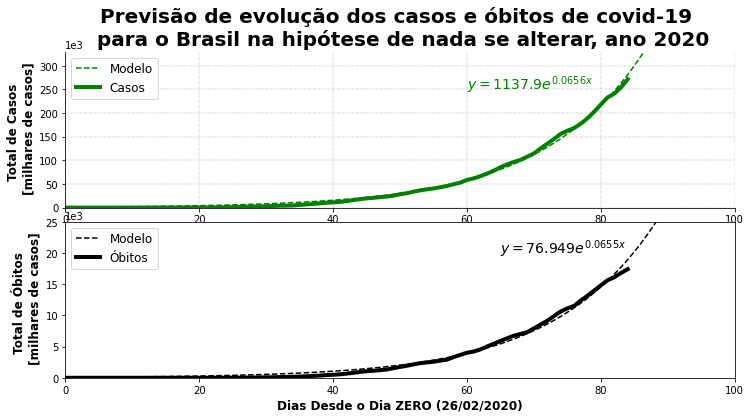

In [84]:
plt.figure(figsize=(12,6))

#figura dos números de casos
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=2)
ax1.axis([0, 100, -1, 330000])
fit_casos = ajuste_modelo(brazil_df, 'total_cases')
plot_model(fit_casos[0], fit_casos[1], 'green')
my_plots(brazil_df, 'total_cases', 'green', 'Casos')
ax1.set_title('Previsão de evolução dos casos e óbitos de covid-19 \n para '\
              'o Brasil na hipótese de nada se alterar, ano 2020', fontsize=20, 
              weight='bold')
ax1.set_ylabel('Total de Casos \n [milhares de casos]', weight='bold', fontsize=12)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(ls='-.', lw=0.45)
ax1.legend(['Modelo', 'Casos'], fontsize=12, loc='upper left')
ax1.text(60, 250000, '$y= %.1f e^{ %.4f x}$'%tuple(fit_casos), color='green', 
         fontsize=14)

#figura do números de óbitos
ax2 = plt.subplot2grid((4,4), (2,0), colspan=4, rowspan=2)
ax2.axis([0, 100, -1, 25000])
fit_obitos = ajuste_modelo(brazil_df, 'total_deaths')
plot_model(fit_obitos[0], fit_obitos[1], 'black')
my_plots(brazil_df, 'total_deaths', 'black', 'Óbito')
ax2.set_xlabel('Dias Desde o Dia ZERO (26/02/2020)', weight='bold', fontsize=12)
ax2.set_ylabel('Total de Óbitos \n [milhares de casos]', weight='bold', fontsize=12)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(ls='-.', lw=0.45)
ax2.legend(['Modelo', 'Óbitos'], fontsize=12, loc='upper left')
ax2.text(65, 20000, '$y= %.3f e^{ %.4f x}$'%tuple(fit_obitos), color='black', 
         fontsize=14)


#plt.show()
plt.savefig("estimativa_brasil-2020.05.20.png", bbox_inches='tight', dpi=600)

## Verificando o número de *mortes*


*usando um gráfico*

In [85]:
usa_df['total_deaths'].max()

91921

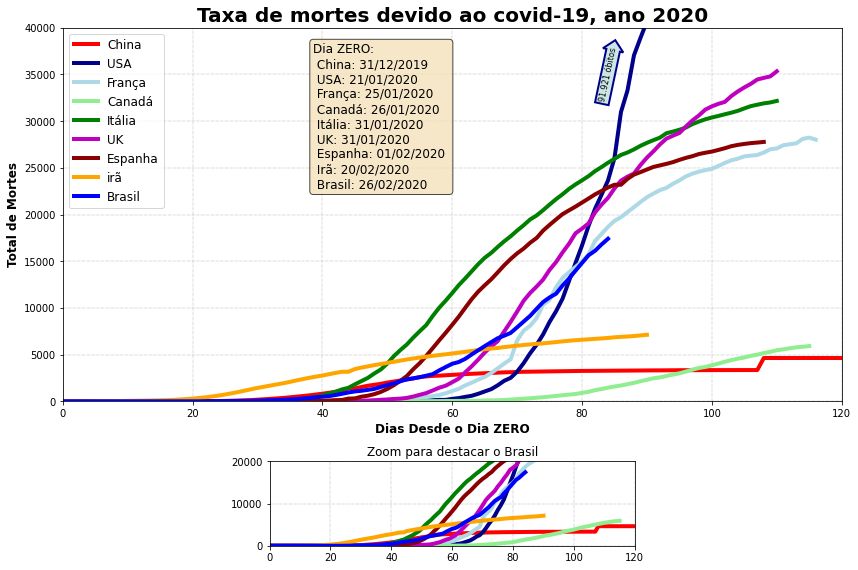

In [98]:
fig3 = plt.figure(figsize=(12,8))

#plotando o principal
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
ax1.axis([0, 120, -1, 40000])
my_plots(china_df, 'total_deaths', 'red', 'China')
my_plots(usa_df, 'total_deaths', 'darkblue', 'USA')
my_plots(france_df, 'total_deaths', 'lightblue', 'França')
my_plots(canada_df, 'total_deaths', 'lightgreen', 'Canadá')
my_plots(italy_df, 'total_deaths', 'green', 'Itália')
my_plots(uk_df, 'total_deaths', 'm', 'UK')
my_plots(spain_df, 'total_deaths', 'darkred', 'Espanha')
my_plots(iran_df, 'total_deaths', 'orange', 'irã')
my_plots(brazil_df, 'total_deaths', 'blue', 'Brasil')
ax1.grid(ls='-.', lw=0.45)
ax1.legend(fontsize=12, loc='upper left')
ax1.set_title('Taxa de mortes devido ao covid-19, ano 2020', fontsize=20, 
              weight='bold')
ax1.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)
ax1.set_ylabel('Total de Mortes', weight='bold', fontsize=12)

#zoom para destacar o Brasil
ax2 = plt.subplot2grid((4,4), (3,1), colspan=2, rowspan=1)
ax2.axis([0, 120, -1, 20000])
my_plots(china_df, 'total_deaths', 'red', 'China')
my_plots(usa_df, 'total_deaths', 'darkblue', 'USA')
my_plots(france_df, 'total_deaths', 'lightblue', 'França')
my_plots(canada_df, 'total_deaths', 'lightgreen', 'Canadá')
my_plots(italy_df, 'total_deaths', 'green', 'Itália')
my_plots(uk_df, 'total_deaths', 'm', 'UK')
my_plots(spain_df, 'total_deaths', 'darkred', 'Espanha')
my_plots(iran_df, 'total_deaths', 'orange', 'irã')
my_plots(brazil_df, 'total_deaths', 'blue', 'Brasil')
ax2.grid(ls='-.', lw=0.45)
ax2.set_title('Zoom para destacar o Brasil')

fig3.tight_layout(pad=1.0)

#visao artistica
ax = plt.gca()
visao_artistica(0.12, 4.2)

props_usa1 = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="darkblue", lw=2)
text_usa1 = ax1.text(84, 35000, '91.921 óbitos', ha="center", va="center", rotation=78,
            size=8, bbox=props_usa1)

#plt.show()
fig3.savefig("taxa-mortes-global-2020.05.20.png", bbox_inches='tight', dpi=600)

## Novos Casos

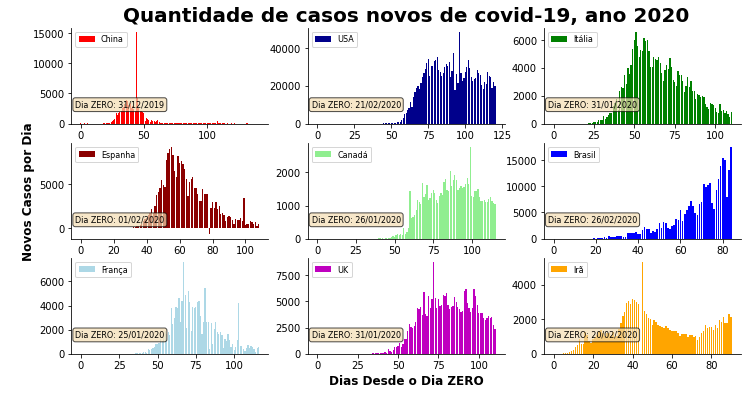

In [100]:
fig4 = plt.figure(figsize=(12,6))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

# CHINA
ax = fig4.add_subplot(331)
my_bar_plots(china_df, 'new_cases', 'red', 'China', '31/12/2019')

# USA
ax = fig4.add_subplot(332)
my_bar_plots(usa_df, 'new_cases', 'darkblue', 'USA', '21/02/2020')
ax.set_title('Quantidade de casos novos de covid-19, ano 2020', fontsize=20, 
              weight='bold')

#ITÁLIA
ax = fig4.add_subplot(333)
my_bar_plots(italy_df, 'new_cases', 'green', 'Itália', '31/01/2020')

#ESPANHA
ax = fig4.add_subplot(334)
my_bar_plots(spain_df, 'new_cases', 'darkred', 'Espanha', '01/02/2020')
ax.set_ylabel('\nNovos Casos por Dia', weight='bold', fontsize=12)

#CANADÁ
ax = fig4.add_subplot(335)
my_bar_plots(canada_df, 'new_cases', 'lightgreen', 'Canadá', '26/01/2020')

#BRASIL
ax = fig4.add_subplot(336)
my_bar_plots(brazil_df, 'new_cases', 'blue', 'Brasil', '26/02/2020')

#FRANÇA
ax = fig4.add_subplot(337)
my_bar_plots(france_df, 'new_cases', 'lightblue', 'França', '25/01/2020')

#REINO UNIDO
ax = fig4.add_subplot(338)
my_bar_plots(uk_df, 'new_cases', 'm', 'UK', '31/01/2020')
ax.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)

#IRÃ
ax = fig4.add_subplot(339)
my_bar_plots(iran_df, 'new_cases', 'orange', 'Irã', '20/02/2020')

#plt.show()
fig4.savefig("novos-casos-global-2020.05.20.png", bbox_inches='tight', dpi=600)


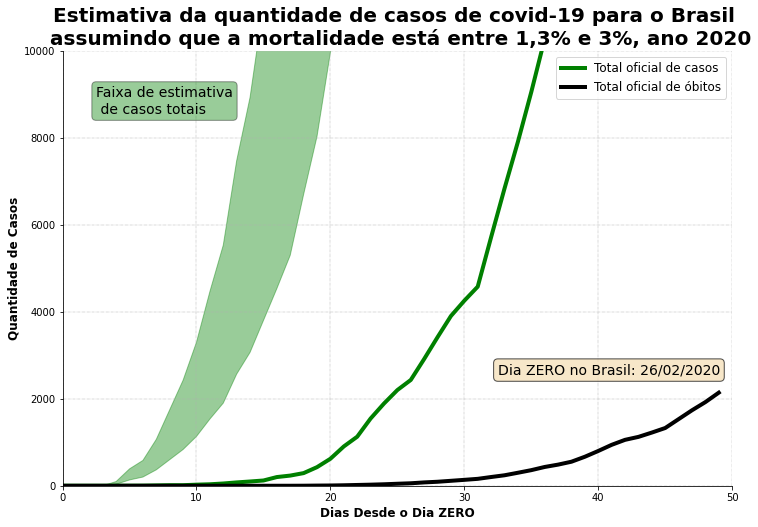

In [0]:
mortes = brazil_df['total_deaths']
casos1 = []
casos2 = []

for i in np.arange(0, 31, 1):
  casos1.insert(i, mortes[i+14]*97.087378)
  casos2.insert(i, mortes[i+14]*33.333333)

plt.figure(figsize=(12,8))

my_plots(brazil_df, 'total_cases', 'green', 'Total oficial de casos')
my_plots(brazil_df, 'total_deaths', 'black', 'Total oficial de óbitos')

#formatando o grafico
plt.legend(fontsize=12)
plt.title('Estimativa da quantidade de casos de covid-19 para o Brasil \n '\
          'assumindo que a mortalidade está entre 1,3% e 3%, ano 2020', 
          fontsize=20, weight='bold')
plt.ylabel('Quantidade de Casos', fontsize=12, weight='bold')
plt.xlabel('Dias Desde o Dia ZERO', fontsize=12, weight='bold')
plt.xticks(fontsize=10)

plt.fill_between(np.arange(0, 31, 1), casos1, casos2, color='green', alpha=0.4)

#visao artistica
ax = plt.gca()
ax.axis([0, 50, -1,10000])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='-.', lw=0.45)

text_box1 = 'Faixa de estimativa\n de casos totais'
prop1 = dict(boxstyle='round', facecolor='green', alpha=0.4)
ax.text(0.05, 0.85, text_box1, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=prop1)

text_box2 = 'Dia ZERO no Brasil: 26/02/2020'
prop2 = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(0.65, 0.25, text_box2, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=prop2)

plt.show()
#plt.savefig("quantidade_brasil-2020.04.14.png", bbox_inches='tight', dpi=600)